In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

In [3]:
def generateData(n):
    """ 
    generates a 2D linearly separable dataset with n samples. 
    The third element of the sample is the label
    """
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5 
    yr = (rand(n)*2-1)/2-0.5 
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],1])
        inputs.append([xr[i],yr[i],-1])
        
    inputs = np.array(inputs)
    x = inputs[:, :2]
    y = inputs[:, 2]
    return x,y

def generateData_sklearn(linsep=True, n_samples=1000):
    if linsep:
        separable = False
        while not separable:
            samples = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
            red = samples[0][samples[1] == 0]
            blue = samples[0][samples[1] == 1]
            separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
    else:
        samples = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, flip_y=-1)
        red = samples[0][samples[1] == 0]
        blue = samples[0][samples[1] == 1]
        
    #plt.plot(red[:, 0], red[:, 1], 'r.')
    #plt.plot(blue[:, 0], blue[:, 1], 'b.')
    #plt.show()
    
    x = samples[0]
    y = samples[1]
    return x, y


def generateDataXor(n_samples):
    """ 
    generates a 2D linearly separable dataset with n samples. 
    The third element of the sample is the label
    """
    xb = (rand(n_samples*2, 2)) 
    
    lab = np.zeros(n_samples*2) - 1
    
    lab[((xb[:,0] < 0.5) & (xb[:,1]>0.5)) | ((xb[:,0]>0.5) & (xb[:,1]<0.5))] = 1
    
    
    return xb, lab 


def plot_separation(net, xmin, xmax):
    
    w0 = net.intercept_[0]
    w1 = net.coef_[0][0]
    w2 = net.coef_[0][1]
    
    slope = -(w1/w2)  
    intercept = -w0/w2
    
    #print (w0, w1, w2, slope, intercept)
    
    y0 = xmin*slope + intercept
    y1 = xmax*slope + intercept
    
    x = [xmin, xmax]
    y = [y0, y1]
    
    plot(x, y, 'k--')
    
    
def plot_data(net, x_test, y_test, title_str):
    fig = figure()
    coords_A = x_test[y_test == 1]
    coords_B = x_test[y_test != 1]

    scatter(coords_A[:,0], coords_A[:,1], c='r', label='Class 1')
    scatter(coords_B[:,0], coords_B[:,1], c='b', label='Class 0')

    legend()

    plot_separation(net, np.min(x_test), np.max(x_test))

    title(title_str)

    return fig


### Dati linearmente separabili

298 0.9933333333333333


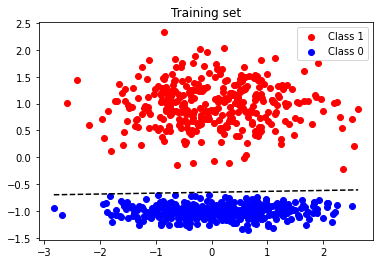

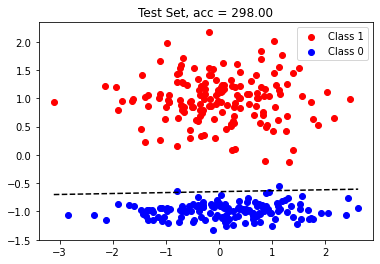

In [7]:
X, y = generateData(100) # train set generation
X, y = generateData_sklearn(True) # train set generation

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the model
net = Perceptron(max_iter=200, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(x_train, y_train)

# Perceptron train data
fig = plot_data(net, x_train, y_train, 'Training set')
fig.savefig('figures/Perceptron_linear_sep.png', dpi=300)

# Perceptron test data accuracy
pred = net.predict(x_test)
accuracy = accuracy_score(y_test, pred, normalize=False)
accuracy2 = accuracy_score(y_test, pred, normalize=True)
print (accuracy, accuracy2)
fig = plot_data(net, x_test, y_test, 'Test Set, acc = %.2f' % accuracy)
fig.savefig('figures/Perceptron_linear_sep_test.png', dpi=300)

In [8]:
for i,p in enumerate(pred):
    if p != y_test[i]:
        print (p, y_test[i], p - y_test[i])

1 0 1
1 0 1


## Dati non separabili linearmente

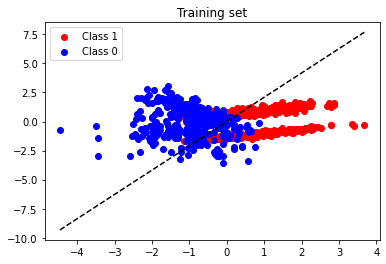

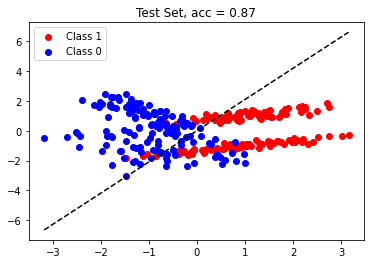

In [10]:
### Dati non separabili linearmente

X, y = generateData_sklearn(False, 1000) # train set generation no linear

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the model
net = Perceptron(max_iter=200, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(x_train, y_train)

# Perceptron train data
fig = plot_data(net, x_train, y_train, 'Training set')
#fig.savefig('/home/giovanni/Scrivania/Immagini_Presentazione_TDM/Perceptron_linear_sep.png', dpi=300)

# Perceptron test data accuracy
pred = net.predict(x_test)
accuracy = accuracy_score(y_test, pred)

fig = plot_data(net, x_test, y_test, 'Test Set, acc = %.2f' % accuracy)
#fig.savefig('/home/giovanni/Scrivania/Immagini_Presentazione_TDM/Perceptron_linear_sep_test.png', dpi=300)

#### XOR

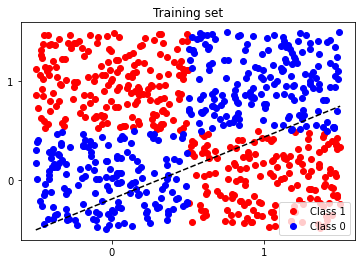

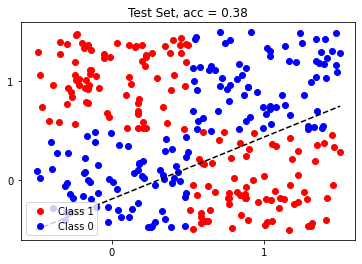

In [11]:
X, y = generateDataXor(500)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the model
net = Perceptron(max_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(x_train, y_train)

fig = plot_data(net, x_train, y_train, 'Training set')
xticks([0.25, 0.75], ['0','1'])
yticks([0.25, 0.75], ['0','1'])

fig.savefig('figures/Perceptron_xor_train.png', dpi=300)

# Perceptron test data accuracy
pred = net.predict(x_test)
accuracy = accuracy_score(y_test, pred)

fig = plot_data(net, x_test, y_test, 'Test Set, acc = %.2f' % accuracy)
xticks([0.25, 0.75], ['0','1'])
yticks([0.25, 0.75], ['0','1'])
fig.savefig('figures/Perceptron_xor_test.png', dpi=300)

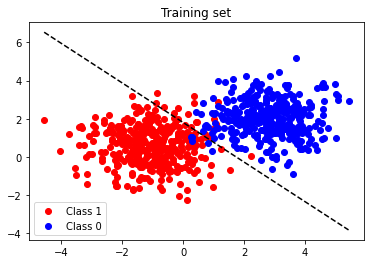

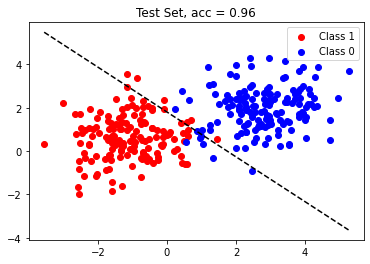

In [13]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(-5.0, 5.0))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

net = Perceptron(max_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(x_train, y_train)
fig = plot_data(net, x_train, y_train, 'Training set')

pred = net.predict(x_test)
accuracy = accuracy_score(y_test, pred)

fig = plot_data(net, x_test, y_test, 'Test Set, acc = %.2f' % accuracy)

In [14]:
print ('%.3f' % accuracy_score(y_test, pred))

0.957
